In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.3.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(train_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


In [6]:
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

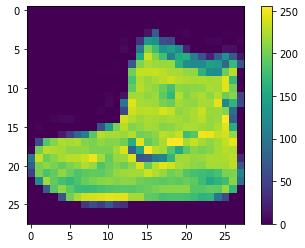

In [7]:
#preprocessing_data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
#plt.grid()
plt.show()

In [8]:
np.array(train_images[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

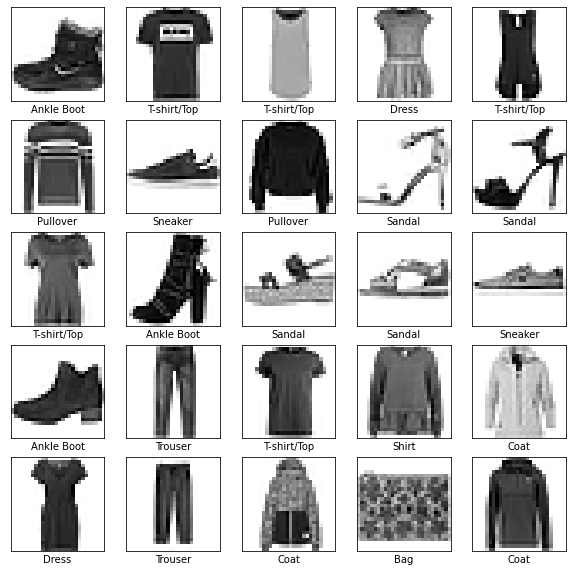

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#model creation
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                      keras.layers.Dense(128,activation='relu'),
                      keras.layers.Dense(10)])

In [12]:
#model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [13]:
#train_data
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4973 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3378 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2820 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2492 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [14]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3707 - accuracy: 0.8756


In [15]:
#make preds 
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
prediction=probability_model.predict(test_images)

In [17]:
prediction[0]

array([9.2621116e-10, 4.7170770e-12, 2.0458561e-12, 1.4439307e-11,
       1.5585903e-10, 1.0187276e-05, 3.3155108e-09, 6.0460418e-03,
       2.2283254e-08, 9.9394375e-01], dtype=float32)

In [18]:
np.argmax(prediction[0])

9

In [19]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

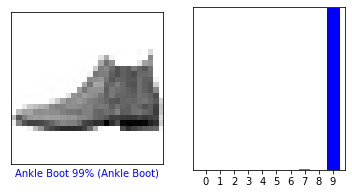

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

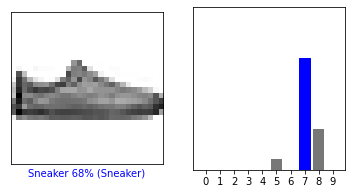

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

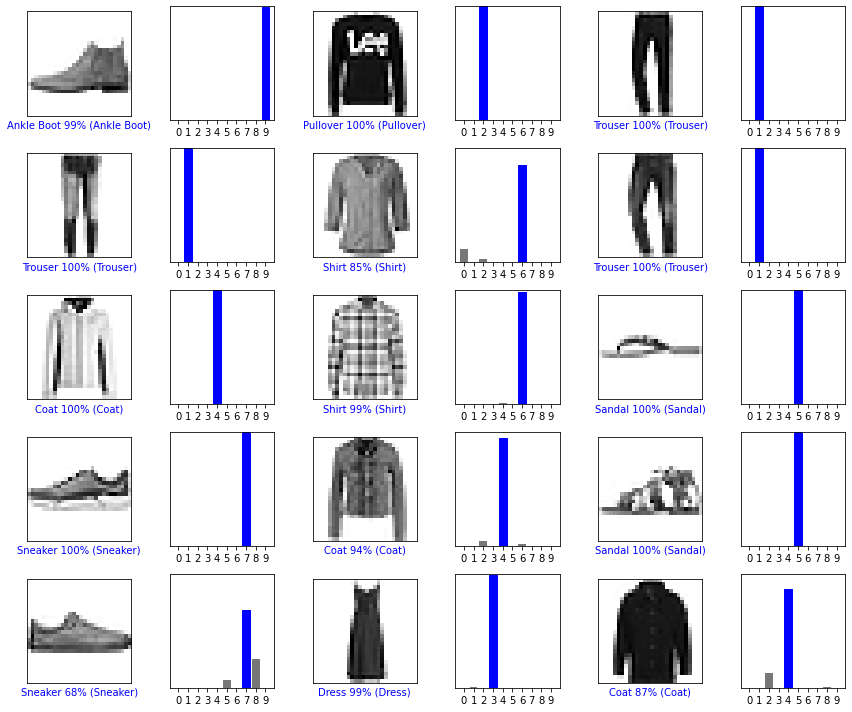

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.0141402e-06 1.7039529e-13 9.9936539e-01 1.4510975e-12 5.3674675e-04
  4.6607561e-14 8.8766450e-05 5.3594068e-17 1.3347996e-10 2.6332973e-16]]


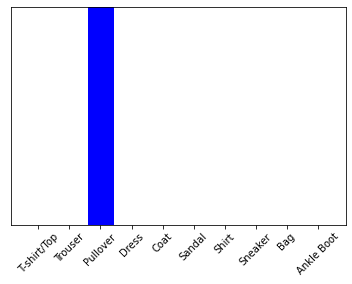

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2

In [ ]:
#basic test classification